In [1]:
import tensorflow as tf
import os
import sys 
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def visualise(path,number_of_images = 5):
    listOfFileNames = []
    for i in os.listdir(path):
        if os.path.isfile:
            listOfFileNames.append(os.path.join(path,i))
    fig, axes = plt.subplots(1,number_of_images,figsize=(20,5),facecolor='white')
    for i,name in enumerate(listOfFileNames[:number_of_images]):
        img = plt.imread(name)
        axes[i].axis('off')
        axes[i].imshow(img)
        axes[i].set_title(name)
    plt.show() 

In [2]:
classes =['one', 'fist', 'palm', 'three2']
classes

['one', 'fist', 'palm', 'three2']

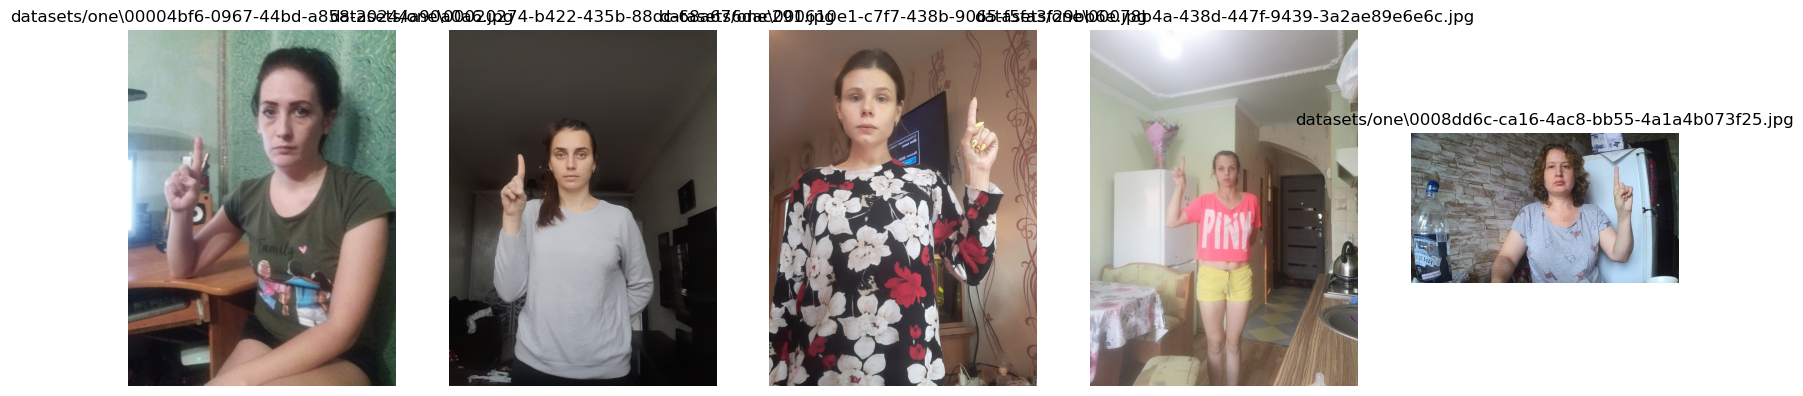

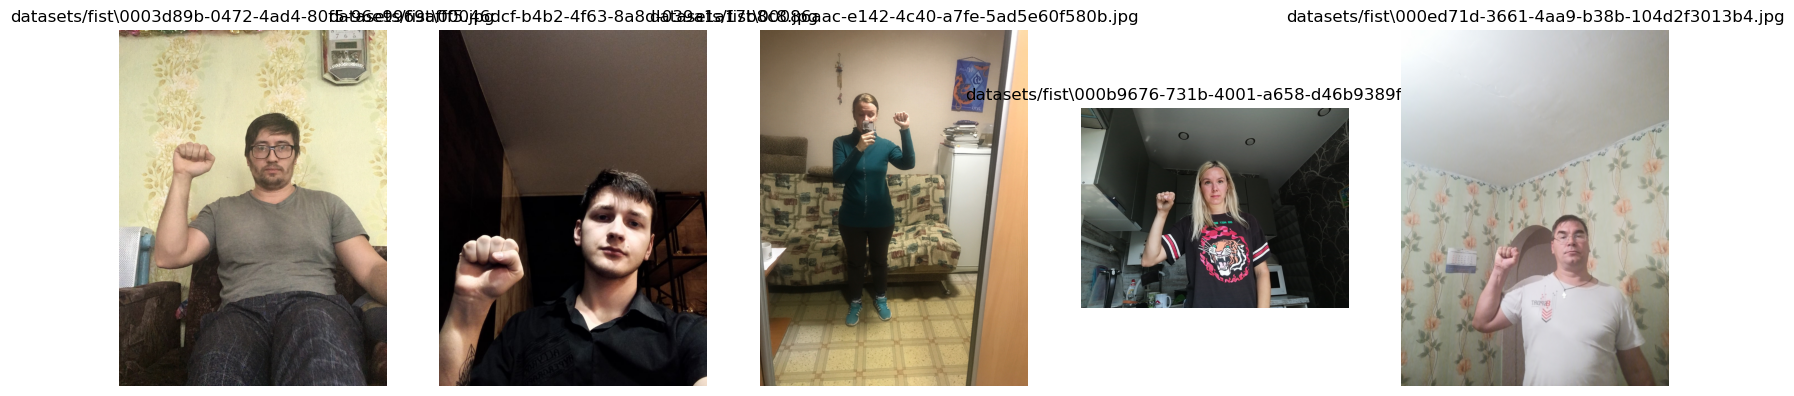

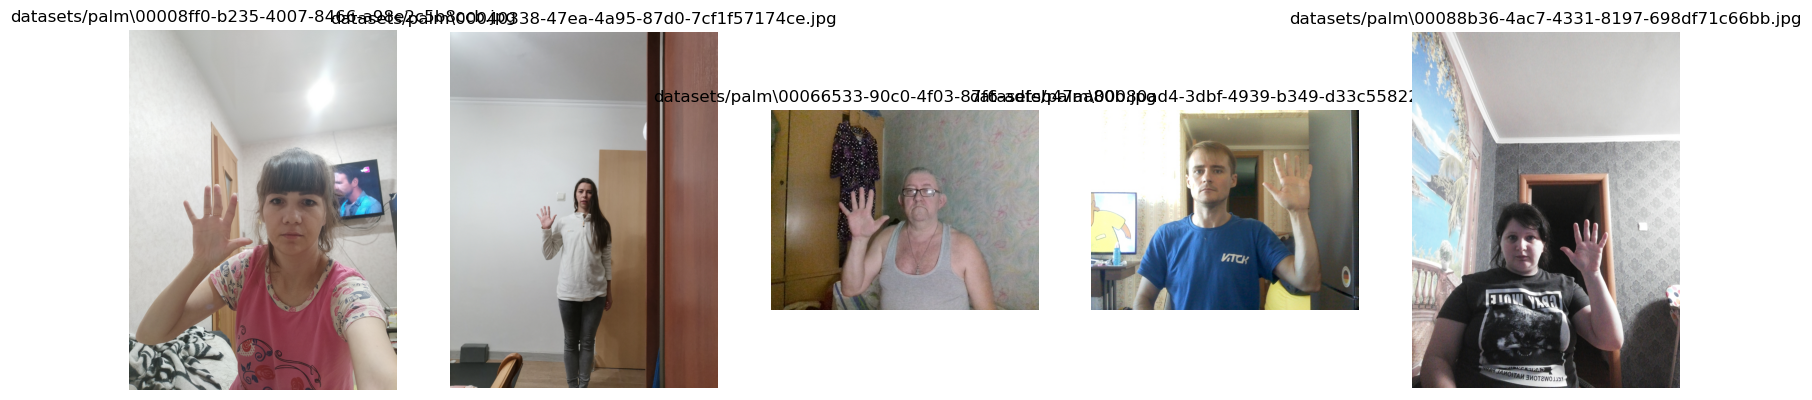

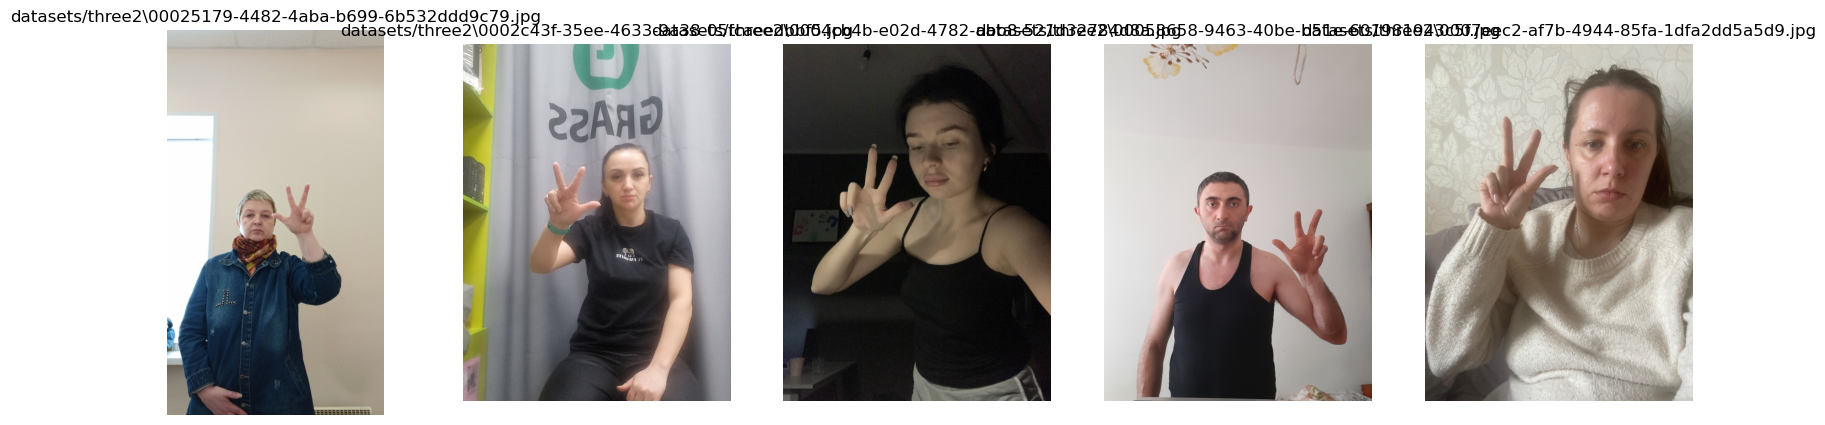

In [4]:
for class_ in classes:
    visualise(f"datasets/{class_}")

In [5]:
def readAnnotations():
    with open("annotations/test/palm.json", 'r') as f:
        json_test_palm = json.load(f)
    with open("annotations/train/palm.json", 'r') as f:
        json_train_palm = json.load(f)
    with open("annotations/val/palm.json", 'r') as f:
        json_val_palm = json.load(f)
    with open("annotations/test/fist.json", 'r') as f:
        json_test_fist = json.load(f)
    with open("annotations/train/fist.json", 'r') as f:
        json_train_fist = json.load(f)
    with open("annotations/val/fist.json", 'r') as f:
        json_val_fist = json.load(f)
    print(len(json_train_palm))
    print(len(json_test_palm))
    print(len(json_val_palm))
    print(len(json_train_fist))
    print(len(json_test_fist))
    print(len(json_val_fist))
    return json_train_palm,json_val_palm,json_test_palm,json_train_fist,json_val_fist,json_test_fist
    

In [6]:
def readAnnotationsThreeCall():
    with open("annotations/test/call.json", 'r') as f:
        json_test_call = json.load(f)
    with open("annotations/train/call.json", 'r') as f:
        json_train_call = json.load(f)
    with open("annotations/val/call.json", 'r') as f:
        json_val_call = json.load(f)
    with open("annotations/test/three2.json", 'r') as f:
        json_test_three = json.load(f)
    with open("annotations/train/three2.json", 'r') as f:
        json_train_three = json.load(f)
    with open("annotations/val/three2.json", 'r') as f:
        json_val_three = json.load(f)
    print(len(json_train_call))
    print(len(json_test_call))
    print(len(json_val_call))
    print(len(json_train_three))
    print(len(json_test_three))
    print(len(json_val_three))
    return json_train_call,json_test_call,json_val_call,json_train_three,json_val_three,json_test_three

In [7]:
json_train_palm,json_val_palm,json_test_palm,json_train_fist,json_val_fist,json_test_fist=readAnnotations()

23710
5000
3000
23543
5000
3000


In [8]:
json_train_call,json_test_call,json_val_call,json_train_three,json_val_three,json_test_three=readAnnotationsThreeCall()

20061
5000
3000
21626
5000
3000


In [9]:
def getDictFromJson(js):
    return json.loads(js)

In [10]:
type(json_train_palm)

dict

In [11]:
def mergeDicts(train,val,test):
    result={}
    result.update(train)
    print(len(result))
    result.update(test)
    print(len(result))
    result.update(val)
    print(len(result))

    return result

In [12]:
targets = {}

In [13]:
print(len(targets))
palm_dataset = mergeDicts(json_train_palm,json_test_palm,json_val_palm)
fist_dataset = mergeDicts(json_train_fist,json_test_fist,json_val_fist)
call_dataset = mergeDicts(json_train_call,json_test_call,json_val_call)
three_dataset = mergeDicts(json_train_three,json_val_three,json_test_three)

0
23710
26710
31710
23543
26543
31543
20061
23061
28061
21626
26626
29626


In [14]:
for i in palm_dataset:
    targets[i]={"boxes":palm_dataset[i]['bboxes'],"id":palm_dataset[i]['user_id'],"label":palm_dataset[i]['labels']}

In [15]:
for i in fist_dataset:
    targets[i]={"boxes":fist_dataset[i]['bboxes'],"id":fist_dataset[i]['user_id'],"label":fist_dataset[i]['labels']}

In [16]:
for i in call_dataset:
    targets[i]={"boxes":call_dataset[i]['bboxes'],"id":call_dataset[i]['user_id'],"label":call_dataset[i]['labels']}

In [17]:
for i in three_dataset:
    targets[i]={"boxes":three_dataset[i]['bboxes'],"id":three_dataset[i]['user_id'],"label":three_dataset[i]['labels']}

In [18]:
len(targets)

120940

In [19]:
print(targets['ddf82ecf-62f0-4ba1-a13a-121719edb620'])

{'boxes': [[0.53527106, 0.26897507, 0.40367213, 0.32794948]], 'id': 'f0540fd6361100fd9fe7d62a85e384d35349159589eaf6b93ca2db68d7b863f9', 'label': ['palm']}


In [20]:
for i in targets:
    if "no_gesture" in targets[i]['label']:
        if "palm" in targets[i]['label']:
            targets[i]['label'] = ["palm"]
        elif "three2" in targets[i]['label']:
            targets[i]['label'] = ["three2"]
        elif "call" in targets[i]['label']:
            targets[i]['label'] = ["call"]
        else:
            targets[i]['label'] = ["fist"]

In [4]:
def loadImage(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

In [5]:
def getImageNames(filepath):
    image_names = []
    for filename in os.listdir(filepath):
        image_names.append(filename)
    return image_names
    

In [7]:
listImages = getImageNames("datasets/palm")
listImagesFist = getImageNames("datasets/fist")
listImagesThree = getImageNames("datasets/three2")
listImagesOne = getImageNames("datasets/one")

In [25]:
print(listImages[1][:-4])
print(listImagesFist[1][:-4])

00040338-47ea-4a95-87d0-7cf1f57174ce
00046dcf-b4b2-4f63-8a8d-039a1a17b8c8


In [26]:
image = loadImage("datasets/palm/42ef1a10-15ee-4633-915b-0902ad560399.jpg")
print(image)
image=np.array(image)

<PIL.Image.Image image mode=RGB size=1440x1920 at 0x21794EB3400>


In [27]:
print(image)

[[[ 76  68  79]
  [ 78  68  77]
  [ 68  61  68]
  ...
  [139 125 116]
  [138 122 122]
  [142 123 129]]

 [[ 78  72  82]
  [ 80  72  83]
  [ 73  65  76]
  ...
  [135 123 111]
  [135 122 114]
  [133 119 116]]

 [[ 77  74  83]
  [ 77  71  83]
  [ 72  66  78]
  ...
  [135 127 108]
  [130 123 105]
  [125 117 104]]

 ...

 [[ 82  84 105]
  [ 77  79 100]
  [ 75  80 100]
  ...
  [145 157 157]
  [147 158 154]
  [145 152 145]]

 [[ 93  90 111]
  [ 87  85 106]
  [ 83  84 105]
  ...
  [149 159 160]
  [146 155 154]
  [145 147 144]]

 [[102  94 115]
  [ 99  94 116]
  [ 97  93 116]
  ...
  [150 160 161]
  [148 154 154]
  [144 144 144]]]


In [28]:
image.shape

(1920, 1440, 3)

In [31]:
allImages = listImages+listImagesFist+listImagesOne+listImagesThree
print(len(allImages))

124751


In [32]:
for i in range(5):
    image = loadImage(f"datasets/palm/{allImages[i]}")
    image = np.array(image)
    print(image,targets[allImages[i][:-4]]['label'])

[[[218 222 221]
  [220 224 223]
  [220 224 223]
  ...
  [185 190 186]
  [188 190 187]
  [182 187 183]]

 [[219 225 223]
  [221 225 224]
  [221 226 222]
  ...
  [181 186 182]
  [185 190 186]
  [183 188 184]]

 [[221 227 223]
  [220 226 222]
  [220 225 221]
  ...
  [182 187 183]
  [184 189 185]
  [178 183 179]]

 ...

 [[174 177 168]
  [174 175 167]
  [171 173 162]
  ...
  [198 184 158]
  [197 183 156]
  [193 182 154]]

 [[173 174 166]
  [178 179 171]
  [178 179 171]
  ...
  [192 178 152]
  [198 184 158]
  [197 185 159]]

 [[175 176 168]
  [173 174 166]
  [178 179 171]
  ...
  [194 180 154]
  [202 187 164]
  [197 185 159]]] ['palm']
[[[220 230 232]
  [221 231 233]
  [219 229 231]
  ...
  [138 101  92]
  [137 100  92]
  [138 101  95]]

 [[219 230 232]
  [221 231 233]
  [220 230 232]
  ...
  [140 103  95]
  [139 102  96]
  [137  99  96]]

 [[220 232 232]
  [220 231 233]
  [219 230 232]
  ...
  [138 101  93]
  [138 101  95]
  [138 100  97]]

 ...

 [[218 197 192]
  [217 196 191]
  [216 197 

In [30]:
print(len(targets))
print(len(allImages))

120940
120940


In [31]:
y=[]
for i in range(len(targets)):
    y.append("".join(targets[allImages[i][:-4]]['label']))
print(y[1:5])

['palm', 'palm', 'palm', 'palm']


In [3]:
batch_size = 16
img_height = 256
img_width = 256

In [4]:
trainingSet = tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='training',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))
validationSet=tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='validation',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))

Found 124751 files belonging to 4 classes.
Using 99801 files for training.
Found 124751 files belonging to 4 classes.
Using 24950 files for validation.


In [5]:
num_classes = len(classes)
print(num_classes)

4


In [125]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, 5, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, 7, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, 5, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, 5, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 5, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='valid', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes),
])

In [126]:
model_1.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [168]:
model_1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_20 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 256, 256, 64)      4864      
_________________________________________________________________
batch_normalization_49 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 122, 122, 128)     401536    
_________________________________________________________________
batch_normalization_50 (Batc (None, 122, 122, 128)   

In [128]:
epochs=25
hist = model1.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/25
3024/3024 [==============================] - 436s 142ms/step - loss: 1.2907 - accuracy: 0.4064 - val_loss: 1.1961 - val_accuracy: 0.5221
Epoch 2/25
3024/3024 [==============================] - 434s 143ms/step - loss: 1.0114 - accuracy: 0.7242 - val_loss: 1.0166 - val_accuracy: 0.7186
Epoch 3/25
3024/3024 [==============================] - 421s 139ms/step - loss: 0.9020 - accuracy: 0.8380 - val_loss: 0.9706 - val_accuracy: 0.7658
Epoch 4/25
3024/3024 [==============================] - 448s 148ms/step - loss: 0.8768 - accuracy: 0.8641 - val_loss: 1.0597 - val_accuracy: 0.6692
Epoch 5/25
3024/3024 [==============================] - 458s 151ms/step - loss: 0.8695 - accuracy: 0.8721 - val_loss: 0.8488 - val_accuracy: 0.8928
Epoch 6/25
3024/3024 [==============================] - 464s 153ms/step - loss: 0.8616 - accuracy: 0.8800 - val_loss: 0.8825 - val_accuracy: 0.8584
Epoch 7/25
3024/3024 [==============================] - 424s 140ms/step - loss: 0.8615 - accuracy: 0.8803 - val_

In [130]:
model_1.save_weights("weights/")

In [131]:
model_1.save("weights/h5/weights.h5")

In [6]:
resnet= tf.keras.applications.ResNet50(include_top=False, weights="imagenet",input_shape=(256,256,3))

In [67]:
flat = tf.keras.layers.Flatten()(resnet.output)
output = tf.keras.layers.Dense(num_classes,activation="sigmoid")(flat)
resnetSigmoidNew = tf.keras.Model(inputs=resnet.input,outputs=output)

In [68]:
resnetSigmoidNew.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [69]:
resnetSigmoidNew.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [49]:
epochs=10
histSigNew = resnetSigmoidNew.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/10
3024/3024 [==============================] - 321s 104ms/step - loss: 12.6841 - accuracy: 0.6643 - val_loss: 12.6952 - val_accuracy: 0.7209
Epoch 2/10
3024/3024 [==============================] - 311s 103ms/step - loss: 8.8499 - accuracy: 0.7859 - val_loss: 15.8079 - val_accuracy: 0.7152
Epoch 3/10
3024/3024 [==============================] - 305s 101ms/step - loss: 6.8340 - accuracy: 0.8334 - val_loss: 17.5576 - val_accuracy: 0.7282
Epoch 4/10
3024/3024 [==============================] - 310s 102ms/step - loss: 5.5671 - accuracy: 0.8664 - val_loss: 18.5116 - val_accuracy: 0.7440
Epoch 5/10
3024/3024 [==============================] - 308s 101ms/step - loss: 4.4163 - accuracy: 0.8917 - val_loss: 20.2676 - val_accuracy: 0.7429
Epoch 6/10
3024/3024 [==============================] - 306s 101ms/step - loss: 4.0833 - accuracy: 0.9039 - val_loss: 22.2991 - val_accuracy: 0.7417
Epoch 7/10
3024/3024 [==============================] - 307s 101ms/step - loss: 3.5847 - accuracy: 0.9159

In [51]:
resnetSigmoidNew.save("weights/resnet50Sigmoid.h5")

In [45]:
flatennlay = tf.keras.layers.Flatten()(resnet.output)
outputResnet = tf.keras.layers.Dense(num_classes)(flatennlay)
resnetSoftmax = tf.keras.Model(inputs=resnet.input,outputs=outputResnet)

In [46]:
resnetSoftmax.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
resnetSoftmax.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [48]:
epochs=20
historySoftmaxResnet = resnetSoftmax.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/20
1657/1657 [==============================] - 334s 196ms/step - loss: 10.7887 - accuracy: 0.5639 - val_loss: 11.7140 - val_accuracy: 0.6081
Epoch 2/20
1657/1657 [==============================] - 321s 193ms/step - loss: 7.7340 - accuracy: 0.7006 - val_loss: 13.3472 - val_accuracy: 0.6185
Epoch 3/20
1657/1657 [==============================] - 319s 192ms/step - loss: 6.3616 - accuracy: 0.7541 - val_loss: 14.2589 - val_accuracy: 0.6305
Epoch 4/20
1657/1657 [==============================] - 313s 188ms/step - loss: 5.3425 - accuracy: 0.7947 - val_loss: 15.3266 - val_accuracy: 0.6412
Epoch 5/20
1657/1657 [==============================] - 311s 187ms/step - loss: 4.5483 - accuracy: 0.8236 - val_loss: 18.8892 - val_accuracy: 0.6218
Epoch 6/20
  76/1657 [>.............................] - ETA: 4:30 - loss: 4.6758 - accuracy: 0.8250

KeyboardInterrupt: 

In [19]:
vggSoftmax3 = tf.keras.models.Sequential(layers=vgg19.layers)
vggSoftmax3.add(tf.keras.layers.Flatten())
vggSoftmax3.add(tf.keras.layers.Dense(1024, activation='relu'))
vggSoftmax3.add(tf.keras.layers.Dropout(0.25))
vggSoftmax3.add(tf.keras.layers.Dense(512, activation='relu'))
vggSoftmax3.add(tf.keras.layers.Dropout(0.25))
vggSoftmax3.add(tf.keras.layers.Dense(num_classes))
vggSoftmax3.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
vggSoftmax3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 64, 64, 256)      

In [23]:
epochs=10
historySoftmaxVgg19_3 = vggSoftmax3.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/10
3119/3119 [==============================] - 417s 133ms/step - loss: 1.7829 - accuracy: 0.3879 - val_loss: 1.1069 - val_accuracy: 0.5259
Epoch 2/10
3119/3119 [==============================] - 422s 135ms/step - loss: 1.2207 - accuracy: 0.4510 - val_loss: 1.0585 - val_accuracy: 0.5098
Epoch 3/10
3119/3119 [==============================] - 448s 144ms/step - loss: 1.1255 - accuracy: 0.4778 - val_loss: 0.9775 - val_accuracy: 0.5399
Epoch 4/10
2016/3119 [==================>...........] - ETA: 2:04 - loss: 1.2009 - accuracy: 0.4338

KeyboardInterrupt: 

In [30]:
batch_size = 32
img_height = 224
img_width = 224
trainingSet = tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=189,subset='training',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))
validationSet=tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=189,subset='validation',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))

Found 124751 files belonging to 4 classes.
Using 99801 files for training.
Found 124751 files belonging to 4 classes.
Using 24950 files for validation.


In [16]:
mobilenetV3Large = tf.keras.applications.MobileNetV3Large(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [18]:
mobilenetV3Large.trainable=False

In [17]:
mobilenetV3Large.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_3[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

In [25]:
flat= tf.keras.layers.Flatten()(mobilenetV3Large.output)
BN = tf.keras.layers.BatchNormalization()(flat)
D1 = tf.keras.layers.Dense(units=32,activation="relu")(BN)
outputmobilenetV3Large1 = tf.keras.layers.Dense(num_classes)(D1)
mobilenetV3Large1 = tf.keras.Model(inputs=mobilenetV3Large.input,outputs=outputmobilenetV3Large1)

mobilenetV3Large1.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
mobilenetV3Large1.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_3[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
____________________________________________________________________________________________

In [26]:
epochs=10
historymobilenetV3Large1 = mobilenetV3Large1.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/10
1560/1560 [==============================] - 295s 187ms/step - loss: 0.9649 - accuracy: 0.5727 - val_loss: 0.8887 - val_accuracy: 0.6046
Epoch 2/10
1560/1560 [==============================] - 312s 199ms/step - loss: 0.8619 - accuracy: 0.6225 - val_loss: 0.8744 - val_accuracy: 0.6107
Epoch 3/10
 139/1560 [=>............................] - ETA: 3:40 - loss: 0.8259 - accuracy: 0.6420

KeyboardInterrupt: 

In [27]:
mobilenetV3Large.trainable=True

In [28]:
flat= tf.keras.layers.Flatten()(mobilenetV3Large.output)
BN = tf.keras.layers.BatchNormalization()(flat)
D1 = tf.keras.layers.Dense(units=32,activation="relu")(BN)
outputmobilenetV3Large1 = tf.keras.layers.Dense(num_classes)(D1)
mobilenetV3Large1 = tf.keras.Model(inputs=mobilenetV3Large.input,outputs=outputmobilenetV3Large1)

mobilenetV3Large1.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
mobilenetV3Large1.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_3[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
____________________________________________________________________________________________

In [31]:
epochs=10
historymobilenetV3Large1 = mobilenetV3Large1.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/10
3119/3119 [==============================] - 460s 146ms/step - loss: 0.2188 - accuracy: 0.9209 - val_loss: 0.5122 - val_accuracy: 0.8929
Epoch 2/10
3119/3119 [==============================] - 448s 143ms/step - loss: 0.1092 - accuracy: 0.9623 - val_loss: 0.1395 - val_accuracy: 0.9587
Epoch 3/10
3119/3119 [==============================] - 467s 149ms/step - loss: 0.0871 - accuracy: 0.9699 - val_loss: 0.1618 - val_accuracy: 0.9555
Epoch 4/10
3119/3119 [==============================] - 477s 153ms/step - loss: 0.0955 - accuracy: 0.9674 - val_loss: 0.0952 - val_accuracy: 0.9679
Epoch 5/10
3119/3119 [==============================] - 456s 146ms/step - loss: 0.0597 - accuracy: 0.9791 - val_loss: 0.1274 - val_accuracy: 0.9607
Epoch 6/10
3119/3119 [==============================] - 447s 143ms/step - loss: 0.0556 - accuracy: 0.9807 - val_loss: 0.0933 - val_accuracy: 0.9719
Epoch 7/10
3119/3119 [==============================] - 454s 145ms/step - loss: 0.0461 - accuracy: 0.9840 - val_

In [34]:
mobilenetV3Large1.save("weights/mobilenetV3Large1.h5")

In [35]:
resnet.trainable=True

In [56]:
batch_size=32
img_height = 224
img_width = 224
trainingSet = tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='training',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))
validationSet=tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='validation',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))

Found 124751 files belonging to 4 classes.
Using 99801 files for training.
Found 124751 files belonging to 4 classes.
Using 24950 files for validation.


In [53]:
flat= tf.keras.layers.Flatten()(mobilenetV3Large.output)
BN = tf.keras.layers.BatchNormalization()(flat)
D1 = tf.keras.layers.Dense(units=32,activation="relu")(BN)
outputmobilenetV3Large2 = tf.keras.layers.Dense(num_classes,activation='sigmoid')(D1)
mobilenetV3Large2 = tf.keras.Model(inputs=mobilenetV3Large.input,outputs=outputmobilenetV3Large2)

mobilenetV3Large2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
mobilenetV3Large2.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_3[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________________

In [57]:
epochs=5
historymobilenetV3Large2 = mobilenetV3Large2.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/5
3119/3119 [==============================] - 467s 150ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0567 - val_accuracy: 0.9821
Epoch 2/5
3119/3119 [==============================] - 460s 147ms/step - loss: 0.0361 - accuracy: 0.9878 - val_loss: 0.0600 - val_accuracy: 0.9788
Epoch 3/5
3119/3119 [==============================] - 472s 151ms/step - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.1226 - val_accuracy: 0.9827
Epoch 4/5
3119/3119 [==============================] - 442s 141ms/step - loss: 0.0278 - accuracy: 0.9904 - val_loss: 0.0720 - val_accuracy: 0.9810
Epoch 5/5
3119/3119 [==============================] - 442s 141ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0556 - val_accuracy: 0.9827


In [58]:
mobilenetV3Large2.save("weights/mobilenetV3Large2.h5")